### Import Libraries to Get Started

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn 
import seaborn as sns
import math


In [2]:
df = pd.read_csv("M1_final.csv")
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


### Missing Data

<AxesSubplot:>

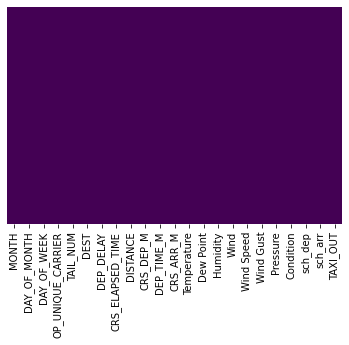

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Didn't get any clue of how much data is missing . Maybe, reason is data set is large but missing data is negligible.

In [4]:
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [5]:
#since we have very larger dataset so we can drop 2 rows easily 
df = df.dropna()
df.isnull().sum()
print('Dataframe dimensions:', df.shape)
df.head()

Dataframe dimensions: (28818, 23)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [6]:
df.drop('TAIL_NUM',axis=1,inplace=True)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,CHS,-1,124,636,324,323,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,LAX,-7,371,2475,340,333,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,FLL,40,181,1069,301,341,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,MCO,-2,168,944,345,343,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,ATL,-4,139,760,360,356,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


### Histogram Plots

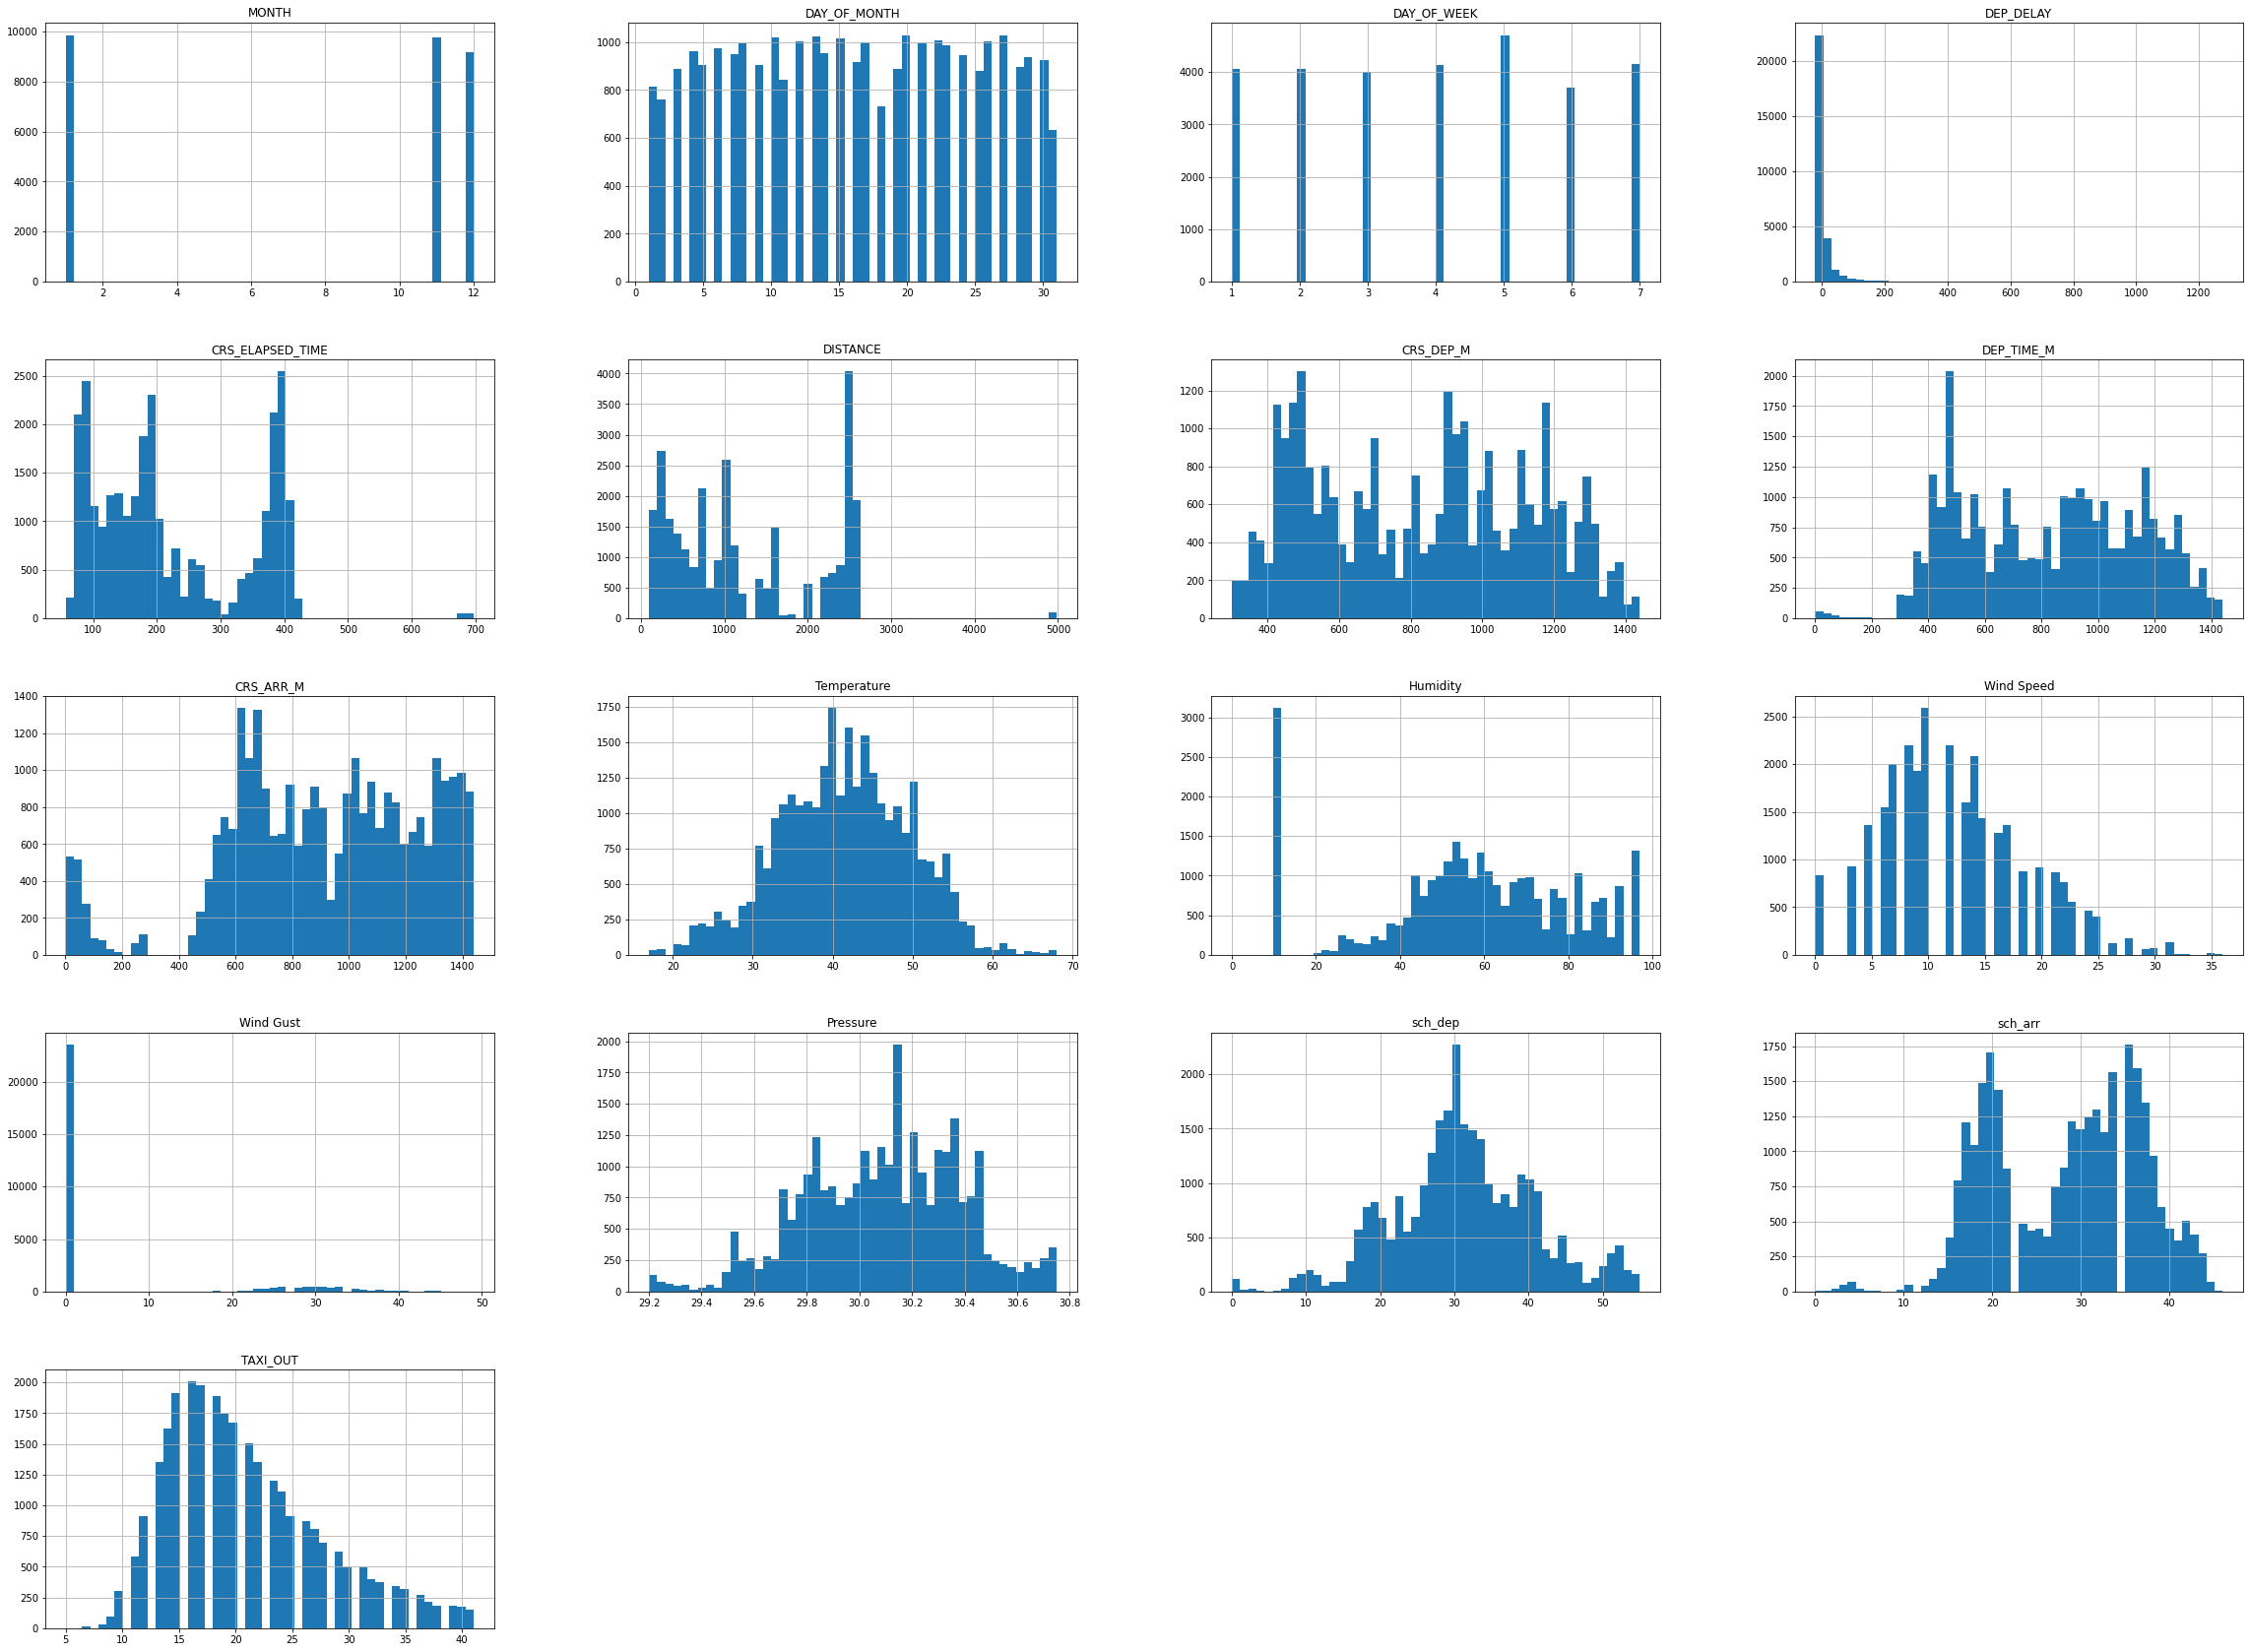

In [7]:
df.hist(bins = 50, figsize = (40, 30))
plt.show()

Histogram plots provides some idea of the distribution of independent variables (numerical and dates).
(1). Most of the 'Wind Gust' values are near 0.
(2). Not all the values of the column 'Dew Point' is Numerical. some of them are in string format. This is why its histogram is not shown.
(3). Cetegorical variables are - 
      'OP_UNIQUE_CARRIER', 'DEST', 'Dew Point', 'Wind', 'Condition' (We have to apply Label and one hot encoding both on these variables)

#### Before going to ML models we have to handle 'Dew Point' column.

In [8]:
df = df[df['Dew Point'].map(lambda x: x.isascii())]
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (27093, 22)


### Input and Output variables in Dataframe

In [9]:
X = df.drop(['TAXI_OUT'],axis = 1)
Y = df.TAXI_OUT
print('Input dimensions:', X.shape)
print('Output dimensions:', Y.shape)
X.head()

Input dimensions: (27093, 21)
Output dimensions: (27093,)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr
0,11,1,5,B6,CHS,-1,124,636,324,323,...,48,34,58,W,25,38,29.86,Fair / Windy,9,17
1,11,1,5,B6,LAX,-7,371,2475,340,333,...,48,34,58,W,25,38,29.86,Fair / Windy,9,17
2,11,1,5,B6,FLL,40,181,1069,301,341,...,48,34,58,W,25,38,29.86,Fair / Windy,9,17
3,11,1,5,B6,MCO,-2,168,944,345,343,...,48,34,58,W,25,38,29.86,Fair / Windy,9,17
4,11,1,5,DL,ATL,-4,139,760,360,356,...,46,32,58,W,24,35,29.91,Fair / Windy,9,17


### Train-Test Splitting

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)
print('Input training dimensions:', X_train.shape)
print('Input testing dimensions:', X_test.shape)
print('Output training dimensions:', Y_train.shape)
print('Output testing dimensions:', Y_test.shape)

Input training dimensions: (24383, 21)
Input testing dimensions: (2710, 21)
Output training dimensions: (24383,)
Output testing dimensions: (2710,)


# (A). Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [12]:
X1_train = X_train.copy()
X1_test = X_test.copy()

In [13]:
X1_train['OP_UNIQUE_CARRIER'] =labelencoder.fit_transform(X1_train['OP_UNIQUE_CARRIER'].astype(str))
X1_test['OP_UNIQUE_CARRIER'] =labelencoder.fit_transform(X1_test['OP_UNIQUE_CARRIER'].astype(str))
X1_train['DEST'] = labelencoder.fit_transform(X1_train['DEST'].astype(str))
X1_train['Dew Point'] = labelencoder.fit_transform(X1_train['Dew Point'].astype(str))
X1_train['Wind'] = labelencoder.fit_transform(X1_train['Wind'].astype(str))
X1_train['Condition'] = labelencoder.fit_transform(X1_train['Condition'].astype(str))
X1_test['DEST'] = labelencoder.fit_transform(X1_test['DEST'].astype(str))
X1_test['Dew Point'] = labelencoder.fit_transform(X1_test['Dew Point'].astype(str))
X1_test['Wind'] = labelencoder.fit_transform(X1_test['Wind'].astype(str))
X1_test['Condition'] = labelencoder.fit_transform(X1_test['Condition'].astype(str))

In [14]:
X1_train.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr
17283,12,26,4,8,63,-4,93,209,989,985,...,46,34,83,1,13,0,30.36,15,28,32
23686,1,15,3,4,4,-1,87,187,1165,1164,...,45,28,68,17,7,0,30.13,17,38,34
15716,12,21,6,6,9,-7,81,184,959,952,...,33,20,78,13,8,0,30.51,0,35,38
9753,11,30,6,3,30,0,168,944,1323,1323,...,34,10,50,4,7,0,30.02,15,22,31
28446,1,30,4,6,47,9,111,427,1260,1269,...,31,15,69,5,5,0,30.35,15,32,30


## Training and Predicting

In [15]:
from sklearn.metrics import mean_squared_error

#### 1. Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_reg = LinearRegression()
linear_reg.fit(X1_train,Y_train)
Y_predicted1 = linear_reg.predict(X1_test)
l1 = mean_squared_error(Y_predicted1,Y_test,squared = False)
print('Linear Regression Error: ', l1)

Linear Regression Error:  6.540952645743153


#### 2. Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X1_train,Y_train)
Y_predicted2 = ridge_reg.predict(X1_test)
l2 = mean_squared_error(Y_predicted2, Y_test, squared = False)
print('Ridge Regression Error: ', l2)

Ridge Regression Error:  6.540953600544131


#### 3. Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X1_train,Y_train)
Y_predicted3 = lasso_reg.predict(X1_test)
l3 = mean_squared_error(Y_predicted3, Y_test, squared = False)
print('Lasso Regression Error: ', l3)

Lasso Regression Error:  6.564036154781706


#### 4. KNN Model

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 200)
knn_reg.fit(X1_train,Y_train)
Y_predicted4=knn_reg.predict(X1_test)
l4 = mean_squared_error(Y_predicted4,Y_test, squared =False)
print('KNN Model Error: ', l4)

KNN Model Error:  6.665225836536187


#### 5. SVR

In [21]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
x1_train = X1_train.copy()
x1_test = X1_test.copy()
s1 = StandardScaler()
s2 = StandardScaler()
x1_train = s1.fit_transform(x1_train)
x1_test = s2.fit_transform(x1_test)
sv_reg  = SVR()
sv_reg.fit(x1_train,Y_train)
Y_predicted5 = sv_reg.predict(x1_test)
l5 = mean_squared_error(Y_predicted5, Y_test, squared= False)
print('SVR Error: ', l5)

SVR Error:  6.324687473232338


#### 6. Naive Bayes

In [22]:
from sklearn.linear_model import BayesianRidge
bayes_reg = BayesianRidge()
bayes_reg.fit(X1_train, Y_train)
Y_predicted6 = bayes_reg.predict(X1_test)
l6 = mean_squared_error(Y_predicted6, Y_test,squared=False)
print('Naive Bayes Error:', l6)

Naive Bayes Error: 6.544852510269603


#### 7. Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
random_for = RandomForestRegressor()
random_for.fit(X1_train, Y_train)
Y_predicted7 = random_for.predict(X1_test)
l7 = mean_squared_error(Y_predicted7, Y_test, squared = False)
print('Random Forest Error:', l7)

Random Forest Error: 5.70398366004812


#### 8. LightGBM

In [24]:
from lightgbm import LGBMRegressor
light_reg = LGBMRegressor()
light_reg.fit(X1_train,Y_train)
Y_predicted8 = light_reg.predict(X1_test)
l8 = mean_squared_error(Y_predicted8, Y_test,squared=False)
print('LightGBM Error:', l8)


LightGBM Error: 5.777314616510717


# 2. One-Hot Encoding

In [26]:
X2 = X.copy()
X2 = pd.get_dummies(X2, columns = ['OP_UNIQUE_CARRIER','Wind','Condition'])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X2['DEST']=label_encoder.fit_transform(X2['DEST'].astype(str))
X2['Dew Point']=label_encoder.fit_transform(X2['Dew Point'])

# One_Hot encoding only for 'OP_UNIQUE_CARRIER','Wind','Condition' variables
# Label encoding for DEST and Dew Point because unique values for them are more than 50.

In [28]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y_train,Y_test = train_test_split(X2,Y,test_size = 0.1)
print('Input training dimensions:', X2_train.shape)
print('Input testing dimensions:', X2_test.shape)
print('Output training dimensions:', Y_train.shape)
print('Output testing dimensions:', Y_test.shape)

Input training dimensions: (24383, 69)
Input testing dimensions: (2710, 69)
Output training dimensions: (24383,)
Output testing dimensions: (2710,)


### Training and Predicting

In [29]:
from sklearn.metrics import mean_squared_error

#### 1. Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X2_train,Y_train)
Y_predicted1 = linear_reg.predict(X2_test)
h1 = mean_squared_error(Y_predicted1,Y_test,squared = False)
print('Linear Regression Error: ', h1)

Linear Regression Error:  6.470769918370758


#### 2. Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X2_train,Y_train)
Y_predicted2 = ridge_reg.predict(X2_test)
h2 = mean_squared_error(Y_predicted2, Y_test, squared = False)
print('Ridge Regression Error: ', h2)

Ridge Regression Error:  6.470935420506287


#### 3. Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X2_train,Y_train)
Y_predicted3 = lasso_reg.predict(X2_test)
h3 = mean_squared_error(Y_predicted3, Y_test, squared = False)
print('Lasso Regression Error: ', h3)

Lasso Regression Error:  6.602146442703057


#### 4. KNN Model

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 200)
knn_reg.fit(X2_train,Y_train)
Y_predicted4=knn_reg.predict(X2_test)
h4 = mean_squared_error(Y_predicted4,Y_test, squared =False)
print('KNN Model Error: ', h4)

KNN Model Error:  6.645389939247315


#### 5. SVR

In [37]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
x2_train = X2_train.copy()
x2_test = X2_test.copy()
s1 = StandardScaler()
s2 = StandardScaler()
x2_train = s1.fit_transform(x2_train)
x2_test = s2.fit_transform(x2_test)
sv_reg  = SVR()
sv_reg.fit(x2_train,Y_train)
Y_predicted5 = sv_reg.predict(x2_test)
h5 = mean_squared_error(Y_predicted5, Y_test, squared= False)
print('SVR Error: ', h5)

SVR Error:  6.2858937090000415


#### 6. Naive Bays

In [38]:
from sklearn.linear_model import BayesianRidge
bayes_reg = BayesianRidge()
bayes_reg.fit(X2_train, Y_train)
Y_predicted6 = bayes_reg.predict(X2_test)
h6 = mean_squared_error(Y_predicted6, Y_test,squared=False)
print('Naive Bayes Error:', h6)

Naive Bayes Error: 6.473188154080073


#### 7. Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
random_for = RandomForestRegressor()
random_for.fit(X2_train, Y_train)
Y_predicted7 = random_for.predict(X2_test)
h7 = mean_squared_error(Y_predicted7, Y_test, squared = False)
print('Random Forest Error:', h7)

Random Forest Error: 5.652006484981512


#### 8. LightBGM

In [40]:
from lightgbm import LGBMRegressor
light_reg = LGBMRegressor()
light_reg.fit(X2_train,Y_train)
Y_predicted8 = light_reg.predict(X2_test)
h8 = mean_squared_error(Y_predicted8, Y_test,squared=False)
print('LightGBM Error:', h8)

LightGBM Error: 5.763035235688627


### Comparison And Conclusion

#### Label Encoding Errors(In Order):

In [41]:
print(l1,l2,l3,l4,l5,l6,l7,l8)

6.540952645743153 6.540953600544131 6.564036154781706 6.665225836536187 6.324687473232338 6.544852510269603 5.70398366004812 5.777314616510717


#### One Hot Encoding Errors(in Order)

In [42]:
print(h1,h2,h3,h4,h5,h6,h7,h8)

6.470769918370758 6.470935420506287 6.602146442703057 6.645389939247315 6.2858937090000415 6.473188154080073 5.652006484981512 5.763035235688627


In [43]:
import matplotlib.pyplot as plt
from matplotlib import style

<function matplotlib.pyplot.show(close=None, block=None)>

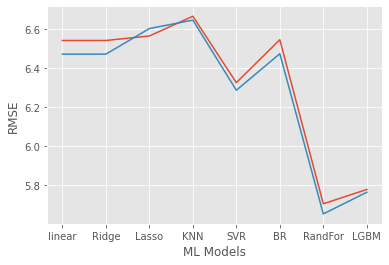

In [45]:
label_errors = np.array([l1,l2,l3,l4,l5,l6,l7,l8])
onehot_errors = np.array([h1,h2,h3,h4,h5,h6,h7,h8])
style.use("ggplot")
plt.plot(["linear","Ridge","Lasso","KNN","SVR","BR","RandFor","LGBM"],label_errors, label="Label Encoding")
plt.plot(["linear","Ridge","Lasso","KNN","SVR","BR","RandFor","LGBM"],onehot_errors, label="One Hot Encoding")
plt.legend(["Label Encoding","One Hot Encoding"])
plt.xlabel("ML Models")
plt.ylabel("RMSE")
plt.show

#### 1. Clearly One hot encoding gives good predictions almost in every Machine Learning Model.
#### 2. Random Forest is best out of all 8 algorithms for making predictions